# Extractor tutorial for Pic du Midi Data

The goal of this notebook is to demonstrate the capabilities of the Spectractor pipeline (still under construction). This pipeline is designed to extract a spectrum from an image given the coordinate (in pixels) of the object.

## Import the pipeline

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

In [3]:
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
print('workbookDir: ' + workbookDir)
#os.chdir(workbookDir)  # If you changed the current working dir, this will take you back to the workbook dir.

workbookDir: /Users/dagoret/MacOSX/GitHub/LSST/Spectractor/notebooks


In [4]:
import sys
sys.path.append(workbookDir)
sys.path.append(os.path.dirname(workbookDir))

In [5]:
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.logbook import LogBook

if __name__ == "__main__":
    from argparse import ArgumentParser

    parser = ArgumentParser()
    parser.add_argument(dest="input", metavar='path', default=["tests/data/reduc_20170605_028.fits"],
                        help="Input fits file name. It can be a list separated by spaces, or it can use * as wildcard.",
                        nargs='*')
    parser.add_argument("-d", "--debug", dest="debug", action="store_true",
                        help="Enter debug mode (more verbose and plots).", default=False)
    parser.add_argument("-v", "--verbose", dest="verbose", action="store_true",
                        help="Enter verbose (print more stuff).", default=False)
    parser.add_argument("-o", "--output_directory", dest="output_directory", default="outputs/",
                        help="Write results in given output directory (default: ./outputs/).")
    parser.add_argument("-l", "--logbook", dest="logbook", default="ctiofulllogbook_jun2017_v5.csv",
                        help="CSV logbook file. (default: ctiofulllogbook_jun2017_v5.csv).")
    parser.add_argument("-c", "--config", dest="config", default="config/ctio.ini",
                        help="INI config file. (default: config.ctio.ini).")
    args = parser.parse_args()


# Configuration

## Flags

In [6]:
parameters.VERBOSE = True
parameters.DEBUG = False

## Date

In [7]:
thedate="20190214"

## Logbook

In [8]:
logbookfilename="../simple_logbook_PicDuMidi_"+thedate+".csv"
#logbookfilename="../ctiofulllogbook_jun2017_v5.csv" 

In [9]:
# good for my logbook
df=pd.read_csv(logbookfilename,sep=",", decimal=".", encoding='latin-1', header='infer')

In [10]:
df.file[0]

'T1M_20190214_234122_495_HD116405-Ronchi_Filtre_None_bin1x1.1_red.fit'

## Input filename

In [11]:
if thedate=="20190215":
    INPUTDIR="/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215"
else:
    INPUTDIR="/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190214"

In [12]:
if thedate=="20190215":
    file_name="T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red.fit"
else:
    file_name="T1M_20190214_234122_495_HD116405-Ronchi_Filtre_None_bin1x1.1_red.fit"    

## Output directory

In [13]:
output_directory="output"

## Config

In [14]:
config="../config/picdumidi.ini"

# Run Logbook

In [15]:
logbook = LogBook(logbookfilename)

In [16]:
tag_file=file_name

In [17]:
disperser_label, target, xpos, ypos = logbook.search_for_image(tag_file)

In [18]:
disperser_label

'Ron145PDM19'

In [19]:
target

'HD116405'

In [20]:
xpos,ypos

(205, 183)

In [21]:
fullfilename=os.path.join(INPUTDIR,file_name)

In [22]:
fullfilename

'/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190214/T1M_20190214_234122_495_HD116405-Ronchi_Filtre_None_bin1x1.1_red.fit'

In [23]:
#assert False,"STOP" 

# Run Spectractor

2019-03-22 20:29:18  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2019-03-22 20:29:18  Image      load_PDM_image       INFO   
	Loading Pic du Midi image /Users/dagoret/DATA/PicDuMidiFev2019/prod_20190214/T1M_20190214_234122_495_HD116405-Ronchi_Filtre_None_bin1x1.1_red.fit...
2019-03-22 20:29:18  Image      load_PDM_image       INFO   
	Image loaded
2019-03-22 20:29:18  Image      load_LogBook         INFO   
	Load Logbook  ../simple_logbook_PicDuMidi_20190214.csv for /Users/dagoret/DATA/PicDuMidiFev2019/prod_20190214/T1M_20190214_234122_495_HD116405-Ronchi_Filtre_None_bin1x1.1_red.fit...
2019-03-22 20:29:18  Image      load_LogBook         INFO   
	Load Logbook  : date identified  20190214 for /Users/dagoret/DATA/PicDuMidiFev2019/prod_20190214/T1M_20190214_234122_495_HD116405-Ronchi_Filtre_None_bin1x1.1_red.fit...
2019-03-22 20:29:18  Image      load_LogBook         WARNING 
	Load Logbook  :  tag_date = 20190214...
2019-03-22 20:29:18  Image      loa

Section: paths
x holo_dir: extractor/dispersers/	 => parameters.HOLO_DIR: /Users/dagoret/MacOSX/GitHub/LSST/Spectractor/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/CTIOThroughput/	 => parameters.THROUGHPUT_DIR: /Users/dagoret/MacOSX/GitHub/LSST/Spectractor/spectractor/simulation/CTIOThroughput/	 <class 'str'>
Section: instrument
x obs_name: PICDUMIDI	 => parameters.OBS_NAME: PICDUMIDI	 <class 'str'>
x obs_altitude: 2.8905	 => parameters.OBS_ALTITUDE: 2.8905	 <class 'float'>
x obs_longitude: 0 08 34.00	 => parameters.OBS_LONGITUDE: 0 08 34.00	 <class 'str'>
x obs_latitude: 42 56 11.00	 => parameters.OBS_LATITUDE: 42 56 11.00	 <class 'str'>
x obs_diameter: 1.0	 => parameters.OBS_DIAMETER: 1.0 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	 => parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	 => parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	 => parameters.OBS_OB

2019-03-22 20:29:19  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      RA_PREC ... SP_TYPE SP_QUAL SP_BIBCODE
             "h:m:s"       "d:m:s"            ...                           
--------- ------------- ------------- ------- ... ------- ------- ----------
HD 116405 13 22 45.1237 +44 42 53.911      14 ...     A0V       C           
2019-03-22 20:29:19  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image...


Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits


2019-03-22 20:29:32  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 2
Parameters:
            c0_0                 c1_0         ...          c1_1        
    -------------------- -------------------- ... ---------------------
    0.043777108155878125 0.009136507587290305 ... 6.027977399108173e-06
2019-03-22 20:29:45  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 2
Parameters:
    c0_0        c1_0        ...          c0_2                   c1_1        
    ---- ------------------ ... ---------------------- ---------------------
     0.0 0.1159757621955447 ... -0.0022831010856552347 0.0012352431806552369
2019-03-22 20:29:46  Image      find_target          INFO   
	X,Y target position in pixels: 205.769,183.491
2019-03-22 20:29:46  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.09 de

   Line   Tabulated  Detected   Shift    ...   Amplitude       SNR     Chisq  
              nm        nm        nm     ...                          reduced 
--------- --------- --------- ---------- ... -------------- --------- --------
     $Fe$   382.044 382.77023 0.72623056 ...  -2.008084e-12  50.64909 547.5311
$Ca_{II}$   393.366  391.2764 -2.0896063 ... -1.7579082e-12  44.33901 547.5311
$Ca_{II}$   396.847  399.2059  2.3589065 ... -1.1683652e-12 29.469202 547.5311
     $Fe$    430.79 427.95264 -2.8373704 ... -6.8812864e-13  17.35639 547.5311
$H\gamma$     434.0 435.50504  1.5050311 ... -4.0426852e-13 10.196701 547.5311
 $H\beta$     486.3  479.7669 -6.5330977 ... -2.7488683e-13  6.933359 547.5311


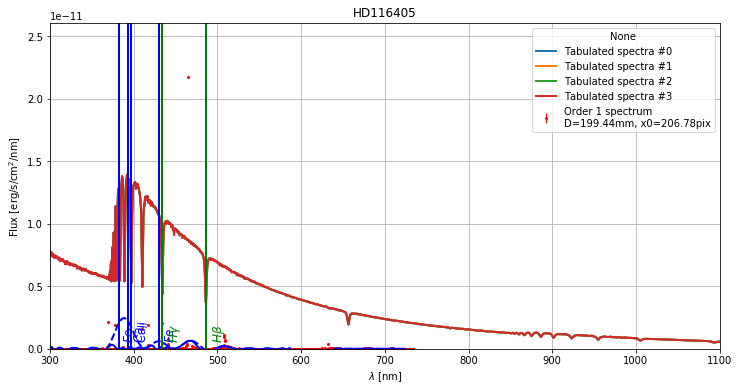

In [24]:
Spectractor(fullfilename,output_directory, [xpos, ypos], target, disperser_label, config,logbook=logbookfilename)